# 1. K-means

## 1.0 Introduccion

El algoritmo K-Means es un método de agrupamiento , este es un ***proceso iterativo de mover los centros de los grupos, o los centroides, a la posición media de sus puntos constituyentes, y reasignar instancias a sus grupos más cercanos***.

 El titular K es un hiperparámetro que especifica el número de clústeres que se deben crear; K-Means asigna automáticamente observaciones a los grupos, ***pero no puede determinar el número apropiado de grupos***. K debe ser un número entero positivo que sea menor que el número de instancias en el conjunto de entrenamiento.


Los parametros de K-means son las posiciones de los centroides de los grupos y las observaciones que se asignan a cada grupo. Al igual que los modelos lineales vistos anteriormente en regresion, los valores óptimos de los parámetros de K-Means se encuentran minimizando una función de costo.

\begin{equation}
J={\sum_{i=1}^N}{\sum_{j=1}^k}|| x_i-c_j||^2
\end{equation}
Donde:

$x_i$: Es el dato i-enesimo este dato es de las forma ($x_1 , x_2 , x_3 , ... , x_n$).

$c_j$: Es el centroide j-enesimo.

$N$: Es la cantidad de dimensiones de la data.

$C$: Es la cantidad de cluster.


***Algortimo de K-means:***

1. Elegir de manera aleatoria los $k$ centroides de los cluster.
2. Se calcula la distancia de cada dato a los $k$ centroides , y le asigna la etiqueta del centroide mas cercano.
3. Una vez identificados los datos que pertenencen a cada cluster , se calcula las coordenadas de los nuevos centroides , atravez del promedio aritmetico de las coordenadas de los datos con la etiqueta asignada anteriomente.
4. Despues de obtener las nuevas coordenadas de los centroides actualizados se repite el paso 2 , para luego seguir con la 3.
5. Este proceso se repite hasta que la posicion de los centroides no varien.

## 1.1 Sklearn

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving analisis.csv to analisis.csv
User uploaded file "analisis.csv" with length 10037 bytes


In [0]:
dataframe = pd.read_csv('analisis.csv')
dataframe.describe()

print(dataframe.describe())


X = np.array(dataframe[["op","ex"]])


kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(np.shape(centroids))

labels = kmeans.predict(X)
print(labels)
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
print(colors)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.scatter(dataframe["op"], dataframe["ex"],color='k', alpha=1)

plt.subplot(122)
plt.scatter(dataframe["op"], dataframe["ex"],color=colors, alpha=0.2)

for i in np.arange(len(centroids)):
  plt.scatter(centroids[i][0], centroids[i][1], s=200 ,color='k', marker="*")

## 1.2 Numpy y pandas

### 1.2.0 Ejemplo 1

In [76]:
## Inicialización
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

#Datos , en formato dataframe apartir de un diccionario
df = pd.DataFrame({
    'x1': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'x2': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

np.random.seed(200)
# Número de centroides k = 3
k = 3

# Inicializamos los centroides a valores aleatorios en el espacio de datos
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

print(centroids)

colmap = {1: 'r', 2: 'g', 3: 'b'}


x='holaaa'

y=x.lstrip('h')
print(y)

{1: [26, 16], 2: [68, 42], 3: [55, 76]}
olaaa


In [77]:
## Asignación de las observaciones a los centroides
 
def asignacion(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - c1)^2 - (x2 - c2)^2)
        df['distance_from_{}'.format(i)] = (  np.sqrt( (df['x1'] - centroids[i][0]) ** 2 + (df['x2'] - centroids[i][1] ) ** 2 ) )

    #print(df)
    # Que hace esta linea de codigo ?   
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    print(centroid_distance_cols)
    # Que hace esta linea de codigo ? 
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    #print(df)
    # Que hace esta linea de codigo ?
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    #print(df)
    # Que hace esta linea de codigo ?
    df['color'] = df['closest'].map(lambda x: colmap[x])

    return df


def update(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x1'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['x2'])
    return centroids


df = asignacion(df, centroids)
print(df)

['distance_from_1', 'distance_from_2', 'distance_from_3']
    x1  x2  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418        1     r
1   20  36        20.880613        48.373546        53.150729        1     r
2   28  30        14.142136        41.761226        53.338541        1     r
3   18  52        36.878178        50.990195        44.102154        1     r
4   29  54        38.118237        40.804412        34.058773        3     b
5   33  46        30.805844        35.227830        37.202150        1     r
6   24  55        39.051248        45.880279        37.443290        3     b
7   45  59        47.010637        28.600699        19.723083        3     b
8   45  63        50.695167        31.144823        16.401219        3     b
9   52  70        59.933296        32.249031         6.708204        3     b
10  51  66        55.901699        29.410882        10.770330        3     b
11  52  63        

In [0]:

fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df['x1'], df['x2'], color='k')


plt.subplot(132)
plt.scatter(df['x1'], df['x2'], color=df['color'], alpha=0.2, edgecolor='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.title('Asignación de los datos al clúster del centroide más cercano')
plt.xlim(0, 80)
plt.ylim(0, 80)



centroids = update(centroids)
df = asignacion(df, centroids)

plt.subplot(133)
plt.scatter(df['x1'], df['x2'], color=df['color'], alpha=0.2, edgecolor='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.title('Asignación de los datos al clúster del centroide más cercano')
plt.xlim(0, 80)
plt.ylim(0, 80)



### 1.2.1 Ejemplo 2

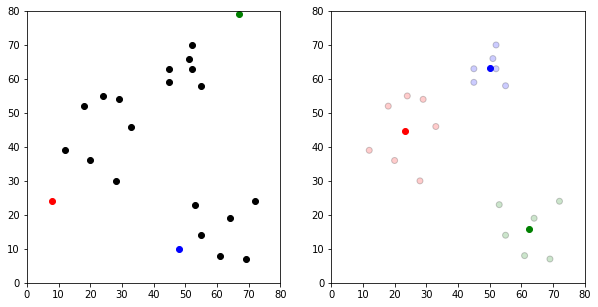

In [0]:
colmap = {1: 'r', 2: 'g', 3: 'b'}
df_1 = pd.DataFrame({
    'x1': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'x2': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

np.random.seed(100)
k = 3

centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}


fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.scatter(df_1['x1'], df_1['x2'], color='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)


df_1 = asignacion(df_1, centroids)

# Necesita tener asignado los cluster
while True:
    closest_centroids = df_1['closest'].copy(deep=True)
    centroids = update(centroids)
    df_1 = asignacion(df_1, centroids)
    if closest_centroids.equals(df_1['closest']):
        break


plt.subplot(122)
plt.scatter(df_1['x1'], df_1['x2'], color=df_1['color'], alpha=0.2, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## 1.3 The elbow method

El metodo del codo consiste en plotear los valores de la funcion de coste producido a diferentes valores de $k$.

A medida que aumenta $k$ la distorsion promedio disminuira.La distorcion promedio es la suma promedio de las distancias de los datos a sus respectivos centroides.

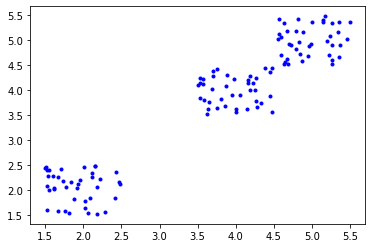

In [92]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#Numero de datos por cluster
N_datos=40
cluster1 = np.random.uniform(1.5, 2.5, (2, N_datos))
cluster2 = np.random.uniform(3.5, 4.5, (2, N_datos))
cluster3 = np.random.uniform(4.5, 5.5, (2, N_datos))

X = np.hstack((cluster1, cluster2,cluster3)).T

#X = np.vstack((x, y)).T
K = range(1, 15)
meandistortions = []
plt.plot(cluster1[0], cluster1[1], 'b.')
plt.plot(cluster2[0], cluster2[1], 'b.')
plt.plot(cluster3[0], cluster3[1], 'b.')

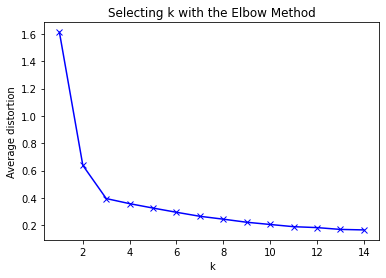

In [93]:
for k in K:
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(X)
   meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#print( np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1) )

plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

### 1.3.0 The elbow method ( 5 min - 1 puntos )

Elaborar un ejemplo de cinco cluster , mostrar con el metodo del codo que elejir k=5 es el mas optimo.

## 1.4 Evaluacion de clusters

Definimos el aprendizaje automático como el diseño y estudio de sistemas que aprenden de la experiencia para mejorar el desempeño de una tarea medida por una métrica determinada. K-Means es un algoritmo de aprendizaje no supervisado; no hay etiquetas o verdad básica para comparar con los grupos. Sin embargo, aún podemos evaluar el rendimiento del algoritmo utilizando medidas intrínsecas.

El ***silhouette coefficient*** es una medida de la compacidad y separación de los grupos. Aumenta a medida que aumenta la calidad de los grupos; ***es grande para grupos compactos que están lejos unos de otros y pequeño para grupos grandes y superpuestos***.

\begin{equation}
s=\frac{ba}{max(a,b)}
\end{equation}

Donde:

$a$: Es la distancia media de los datos a sus cluster mas cercanos.

$b$: Es la distancia media de los datos a su segundo cluster mas cercano.




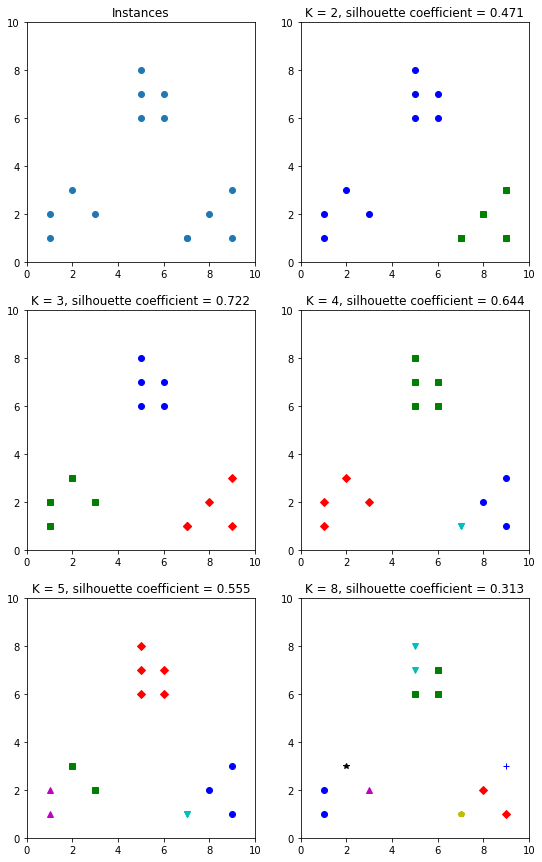

In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

x1 = [1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9]
x2 = [1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3]

X = pd.DataFrame({ 'x1': x1,'x2': x2 })

x1=np.array(x1)
x2=np.array(x2)


fig = plt.figure(figsize=(9, 15))
plt.subplot(3, 2, 1)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1

for t in tests:
  subplot_counter += 1
  plt.subplot(3, 2, subplot_counter)
  kmeans_model = KMeans(n_clusters=t).fit(X)

  for i, l in enumerate(kmeans_model.labels_):
      plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
  plt.xlim([0, 10])
  plt.ylim([0, 10])
  plt.title(  'K = %s, silhouette coefficient = %.03f' % ( t, metrics.silhouette_score(X, kmeans_model.labels_,metric='euclidean') )    )
plt.show()

## 1.5 Tarea 4

Elaborar un dataset donde genere 5 cluster (que se distingan a simple vista los grupos). Con esta data generar el grafico entre $k$ y el coefficient silhouette $s$. El valor de k debe varias de 2 a 10.

Pd. Sugerencia use la forma de general la data del punto $1.3$